In [196]:
import pandas as pd
import numpy as np
import datetime as dt
from datetime import time
import matplotlib.pyplot as plt
%matplotlib inline
import random

data = pd.read_csv('dogparkdata_2012to2018.csv')
data

,Unnamed: 0,names,times,valid
0,0,bdjdaabeacjjbibbafjcjdjfaibib,1/1/2012 8:31:46AM,Valid Access
1,1,abjejijgjejjbiagjebib,1/1/2012 10:27:20AM,Valid Access
2,2,abjejijgjejjbiagjebib,1/1/2012 10:52:26AM,Valid Access
3,3,jeaajfaijijdjjbijdjcbdjcbbbbaabib,1/1/2012 10:52:48AM,Valid Access
4,4,jeaajfaijijdjjbijdjcbdjcbbbbaabib,1/1/2012 11:19:56AM,Valid Access
5,5,acjhbbahjhbeabjibejjbiahjdjhabjejhjcbib,1/1/2012 11:20:13AM,Valid Access
6,6,acjhbbahjhbeabjibejjbiahjdjhabjejhjcbib,1/1/2012 11:35:37AM,Valid Access
7,7,acjijbbejhbeaejjbiabaabcaabebeaaafbib,1/1/2012 12:48:51PM,Valid Access
8,8,acjijbbejhbeaejjbiabaabcaabebeaaafbib,1/1/2012 1:22:28PM,Valid Access
9,9,afjcjdadjijdacjjbiagjcaabebibgbh,1/1/2012 1:51:26PM,Valid Access


In [148]:
data_array = np.array(data)
data_2012 = data_array[0:10891]
data_2013 = data_array[10891:20945]
data_2014 = data_array[20945:32605]
data_2015 = data_array[32605:49340]
data_2016 = data_array[49340:70150]
data_2017 = data_array[70150:87560]
data_2018 = data_array[87560:110066]


In [149]:
def correct_time(array):
    correct_times = []
    for i in range(0,len(array)):
        date_time = array[i][2] 
        time = date_time[-10:-2]
        am_pm = date_time[-2]
        minute = int(time[3:5])
        second = int(time[6:8])
        hour = int(time[0:2]) 
        if am_pm == 'A' and hour != 12:
            correct_times.append([hour, minute,second])
        elif am_pm == 'P'and hour != 12:
            hour += 12
            correct_times.append([hour, minute, second])
        elif am_pm == 'A' and hour == 12:
            hour = 0
            correct_times.append([hour, minute, second])
        elif am_pm == 'P' and hour == 12:
            hour = 12
            correct_times.append([hour,minute,second])
    return(correct_times) 

In [150]:
correct_time(data_2012)

[[8, 31, 46],
 [10, 27, 20],
 [10, 52, 26],
 [10, 52, 48],
 [11, 19, 56],
 [11, 20, 13],
 [11, 35, 37],
 [12, 48, 51],
 [13, 22, 28],
 [13, 51, 26],
 [14, 30, 51],
 [14, 37, 13],
 [15, 20, 6],
 [15, 26, 14],
 [15, 30, 36],
 [15, 55, 53],
 [16, 36, 43],
 [16, 54, 51],
 [8, 14, 16],
 [8, 23, 23],
 [9, 0, 18],
 [9, 23, 18],
 [9, 43, 26],
 [9, 44, 22],
 [10, 14, 2],
 [10, 47, 32],
 [11, 11, 34],
 [11, 22, 36],
 [11, 57, 3],
 [11, 57, 7],
 [12, 28, 29],
 [12, 34, 42],
 [12, 36, 3],
 [13, 24, 42],
 [13, 36, 8],
 [13, 38, 8],
 [14, 6, 2],
 [14, 28, 44],
 [16, 39, 6],
 [8, 34, 7],
 [8, 54, 21],
 [9, 6, 17],
 [10, 9, 30],
 [10, 38, 32],
 [11, 36, 2],
 [12, 0, 46],
 [12, 32, 55],
 [12, 50, 8],
 [13, 51, 40],
 [15, 33, 47],
 [15, 44, 21],
 [8, 32, 12],
 [8, 55, 7],
 [9, 31, 28],
 [10, 28, 19],
 [10, 59, 15],
 [11, 20, 30],
 [11, 47, 32],
 [12, 2, 15],
 [12, 32, 58],
 [12, 49, 3],
 [12, 54, 38],
 [13, 26, 6],
 [13, 44, 40],
 [13, 48, 3],
 [14, 17, 28],
 [14, 40, 23],
 [15, 35, 34],
 [15, 37, 35],


In [151]:
def correct_date(array):
    correct_dates = []
    for i in range(0, len(array)):
        date_time = array[i][2]
        date = date_time[0:10]
        find_month = date.partition('/')
        month = int(find_month[0])
        find_day = find_month[2].partition('/')
        day = int(find_day[0])
        year = int(find_day[2])
        correct_dates.append([month,day,year])
    return(correct_dates)


In [152]:
correct_date(data_2012)

[[1, 1, 2012],
 [1, 1, 2012],
 [1, 1, 2012],
 [1, 1, 2012],
 [1, 1, 2012],
 [1, 1, 2012],
 [1, 1, 2012],
 [1, 1, 2012],
 [1, 1, 2012],
 [1, 1, 2012],
 [1, 1, 2012],
 [1, 1, 2012],
 [1, 1, 2012],
 [1, 1, 2012],
 [1, 1, 2012],
 [1, 1, 2012],
 [1, 1, 2012],
 [1, 1, 2012],
 [1, 2, 2012],
 [1, 2, 2012],
 [1, 2, 2012],
 [1, 2, 2012],
 [1, 2, 2012],
 [1, 2, 2012],
 [1, 2, 2012],
 [1, 2, 2012],
 [1, 2, 2012],
 [1, 2, 2012],
 [1, 2, 2012],
 [1, 2, 2012],
 [1, 2, 2012],
 [1, 2, 2012],
 [1, 2, 2012],
 [1, 2, 2012],
 [1, 2, 2012],
 [1, 2, 2012],
 [1, 2, 2012],
 [1, 2, 2012],
 [1, 2, 2012],
 [1, 3, 2012],
 [1, 3, 2012],
 [1, 3, 2012],
 [1, 3, 2012],
 [1, 3, 2012],
 [1, 3, 2012],
 [1, 3, 2012],
 [1, 3, 2012],
 [1, 3, 2012],
 [1, 3, 2012],
 [1, 3, 2012],
 [1, 3, 2012],
 [1, 4, 2012],
 [1, 4, 2012],
 [1, 4, 2012],
 [1, 4, 2012],
 [1, 4, 2012],
 [1, 4, 2012],
 [1, 4, 2012],
 [1, 4, 2012],
 [1, 4, 2012],
 [1, 4, 2012],
 [1, 4, 2012],
 [1, 4, 2012],
 [1, 4, 2012],
 [1, 4, 2012],
 [1, 4, 2012],
 [1, 4, 20

In [153]:
times_2012 = correct_time(data_2012)
dates_2012 = correct_date(data_2012)
times_2013 = correct_time(data_2013)
dates_2013 = correct_date(data_2013)
times_2014 = correct_time(data_2014)
dates_2014 = correct_date(data_2014)
times_2015 = correct_time(data_2015)
dates_2015 = correct_date(data_2015)
times_2016 = correct_time(data_2016)
dates_2016 = correct_date(data_2016)
times_2017 = correct_time(data_2017)
dates_2017 = correct_date(data_2017)
times_2018 = correct_time(data_2018)
dates_2018 = correct_date(data_2018)

Text(0,0.5,'Total Scans')

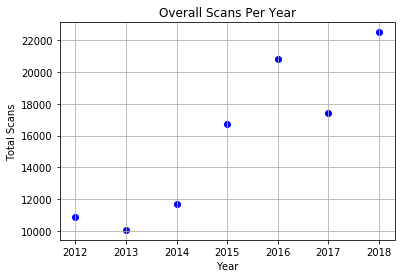

In [154]:
scans_per_year = [len(dates_2012),len(dates_2013),len(dates_2014),len(dates_2015), len(dates_2016),len(dates_2017), len(dates_2018)]
year = 2012,2013,2014,2015,2016,2017, 2018
plt.scatter(year,scans_per_year,color = "blue")
plt.grid()
plt.title("Overall Scans Per Year")
plt.xlabel("Year")
plt.ylabel("Total Scans")

In [155]:
def find_indices(month,day,year,date_array):
    begin = date_array.index([month,day,year])
    end = date_array.index([month,day+1,year]) 
    return(begin,end)



In [156]:
#test!
find_indices(2,14,2017,dates_2017)

(1846, 1893)

In [157]:
#these indices can do tons of stuff!! it can print the array of times we created earlier

times_2017[1846:1893]

[[8, 41, 11],
 [8, 45, 57],
 [9, 33, 32],
 [10, 23, 16],
 [10, 32, 34],
 [10, 38, 26],
 [10, 51, 19],
 [11, 28, 44],
 [11, 44, 0],
 [11, 47, 32],
 [11, 54, 31],
 [12, 3, 26],
 [12, 17, 45],
 [12, 20, 17],
 [12, 30, 8],
 [12, 52, 27],
 [13, 47, 6],
 [13, 52, 34],
 [14, 29, 45],
 [14, 33, 40],
 [14, 55, 42],
 [15, 7, 30],
 [15, 8, 58],
 [15, 18, 37],
 [15, 20, 11],
 [15, 43, 2],
 [15, 44, 25],
 [15, 51, 49],
 [15, 52, 18],
 [15, 55, 20],
 [16, 11, 11],
 [16, 21, 18],
 [16, 27, 31],
 [16, 37, 48],
 [16, 41, 34],
 [16, 42, 40],
 [16, 53, 39],
 [17, 3, 46],
 [17, 6, 25],
 [17, 8, 21],
 [17, 16, 27],
 [17, 20, 53],
 [17, 42, 8],
 [17, 43, 24],
 [17, 59, 59],
 [18, 23, 37],
 [21, 29, 21]]

In [158]:
data_2017[1846:1893]

array([[1846, 'aabejhbfaaaijjbibbjibejejdjiaibibgbbaajdacbigdbh',
        '2/14/2017   8:41:11AM', 'Valid Access'],
       [1847, 'jbaajdacjjbiafjcjhacjhbiaabeacbibfjhbbafaajcaibib',
        '2/14/2017   8:45:57AM', 'Valid Access'],
       [1848, 'aabejhbfaaaijjbibbjibejejdjiaibibgbbaajdacbigdbh',
        '2/14/2017   9:33:32AM', 'Valid Access'],
       [1849, 'bbjdaabeacaaaiaijjbijejhbfbibgbbaajdacbibbh',
        '2/14/2017  10:23:16AM', 'Valid Access'],
       [1850, 'bcjiaejcaibiagjdjjbiagaabbahbib', '2/14/2017  10:32:34AM',
        'Valid Access'],
       [1851, 'bejcaiabjibejjbiaajdbbafjcaiaiaabib',
        '2/14/2017  10:38:26AM', 'Valid Access'],
       [1852, 'acjgjajgjcjejejcjjbiahjfaijcbib', '2/14/2017  10:51:19AM',
        'Valid Access'],
       [1853, 'bcjhbebbjcbejejjbiagjibebib', '2/14/2017  11:28:44AM',
        'Valid Access'],
       [1854, 'bcjiaejcaibiagjdjjbiagaabbahbib', '2/14/2017  11:44:00AM',
        'Valid Access'],
       [1855, 'bcjhbebbjcbejejjbiagjibebib', 

In [159]:
userid = []
for i in range(0,len(data_2017)):
    userid.append(data_2017[i][1])
practice = userid[1846:1893]
practice

['aabejhbfaaaijjbibbjibejejdjiaibibgbbaajdacbigdbh',
 'jbaajdacjjbiafjcjhacjhbiaabeacbibfjhbbafaajcaibib',
 'aabejhbfaaaijjbibbjibejejdjiaibibgbbaajdacbigdbh',
 'bbjdaabeacaaaiaijjbijejhbfbibgbbaajdacbibbh',
 'bcjiaejcaibiagjdjjbiagaabbahbib',
 'bejcaiabjibejjbiaajdbbafjcaiaiaabib',
 'acjgjajgjcjejejcjjbiahjfaijcbib',
 'bcjhbebbjcbejejjbiagjibebib',
 'bcjiaejcaibiagjdjjbiagaabbahbib',
 'bcjhbebbjcbejejjbiagjibebib',
 'afjijgaiacabjbjijdjeafjjbibfjhahjcbib',
 'bejcbcjhaiaijcjjbibdjcbebiaabeacbibfaajdjfbib',
 'bejcaiabjibejjbiaajdbbafjcaiaiaabib',
 'bejcbcjhaiaijcjjbibdjcbebiaabeacbibfaajdjfbib',
 'afjijgaiacabjbjijdjeafjjbibfjhahjcbib',
 'aiaabeabjhbeaejjbibbjhjejfbijiadjjbiacjcaijcjejcbiaabhahbibgbbaajdacbiabibh',
 'bjjgbfbdjcjdaejjbibbaajeafjfbib',
 'aiaabeabjhbeaejjbibbjhjejfbijiadjjbiacjcaijcjejcbiaabhahbibgbbaajdacbiabibh',
 'bjaabejcjejejhjjbiaaaijcbabib',
 'bjjgbfbdjcjdaejjbibbaajeafjfbib',
 'jhbeaeafaabfbibbjijgbejejfjjbiajaajdahabbijiadadjhbbjcbibgbbaajdacbidcbh',
 'aabdbdjdjgb

In [160]:
uniquepractice = np.unique(practice)
len(uniquepractice)

25

In [161]:
find_indices(7,18,2017,dates_2017)

(10144, 10149)

In [162]:
def find_indices(month,day,year,date_array):
    begin = date_array.index([month,day,year])
    end = date_array.index([month,day+1,year]) 
    return (begin, end) 

In [163]:
#Data collection by day for august 2017
'''
i = 1
july2016 = []
while i <= 30:
    begin1, end1 = find_indices(7,i,2016, dates_2016)
    beginend = [begin1, end1]
    july2016.append(beginend)
    i+=1
    
print(july2016)
len(july2016)
'''
def get_indices_for_date(year_array):
    """
    Gets the indices for each day for the entire month 
    """
    i = 1
    month_array_indices = []
    while i <= 30:
        begin1, end1 = find_indices(7,i,2016, year_array)
        beginend = [begin1, end1]
        month_array_indices.append(beginend)
        i+=1
        
    return month_array_indices

In [164]:

'''
userid_july2016 = []
total_july2016 = []
for t in range(30):
    for i in range(0,len(data_2016)):
        userid_july2016.append(data_2016[i][1])
    practice = userid_july2016[july2016[t-1][0]:july2016[t-1][1]]
    total_july2016.append(practice)
    t+=1
print(total_july2016)
len(total_july2016)
'''


def get_user_ids(year_array, month_array_indices):
    """
    Get user IDs for each of the days of the entire month using the indices that
    were given
    """
    userid_month = []
    total_month = []
    for t in range(30):
        for i in range(0,len(year_array)):
            userid_month.append(year_array[i][1])
        practice = userid_month[month_array_indices[t-1][0]:month_array_indices[t-1][1]]
        total_month.append(practice)
        t+=1
        
    return total_month
        
        

In [165]:
def get_daily_freq(length_of_month, total_month):
    '''
    takes in the length of month and the total_month from get_user_ids function
    to get the unique users each day for the entire month
    '''
    dailyfreq_month = []

    for i in range(31):
        dailyuserid_month = total_month[i-1]
        dailyuniqueusers = np.unique(dailyuserid_month)
        dailyfreq_month.append(len(dailyuniqueusers))
        
    return dailyfreq_month
    
#print(dailyfreq_july2016)
#len(dailyfreq_july2016)
    

In [166]:
def create_date_list():
    '''
    takes in the number of days and creates a list of dates up to the number of days 
    in the month
    '''
    date = []

    for i in range(31):
        i+=1
        date.append(i)
    
    return date
#print(date)



In [167]:
def create_plot(date, dailyfreq_month):
    '''
    creates a plot using date list and daily_freq_month 
    '''
    #daily_freq_plot = plt.plot(date, dailyfreq_july2016, color = 'blue')
    plt.plot(date, dailyfreq_month, color = 'blue')
    plt.grid()
    plt.title("Unique Scans by Day (July 2016)")
    plt.xlabel("Date")
    plt.xticks(np.arange(min(date), max(date)+1, 1.0))
    plt.ylabel("Total Scans")
    plt.ylim(0,70)
    plt.xlim(1,31)
    #plt.figure(figsize=(8,12))
    plt.rcParams['figure.figsize'] = [10, 5]
    plt.show()
    
    
#print(dailyfreq_july2016)

In [168]:
def get_day_of_week():
    '''
    takes in daily_freq_month and returns the day of the week that corresponds 
    to the busiest day
    '''
    max_val_month = max(dailyfreq_month)
    max_index_month = dailyfreq_month.index(max_val_month)
    #print(max_index_july2016)
    day_of_week = dt.date(2016, 7, (max_index_month+1)).weekday()

    if day_of_week == 0:
        busiest_day = 'Monday'
    elif day_of_week == 1:
        busiest_day = "Tuesday"
    elif day_of_week == 2:
        busiest_day = "Wednesday"
    elif day_of_week == 3:
        busiest_day = "Thursday"
    elif day_of_week == 4:
        busiest_day = "Friday"
    elif day_of_week == 5:
        busiest_day = "Saturday"
    else:
        busiest_day = "Sunday"
        
    return busiest_day
    
    

In [169]:
max_val_july2016 = max(dailyfreq_july2016)
max_index_july2016 = dailyfreq_july2016.index(max_val_july2016)
print(max_index_july2016)

17


In [170]:
day_of_week = dt.date(2016, 7, (max_index_july2016+1)).weekday()

if day_of_week == 0:
    print('Monday')
elif day_of_week == 1:
    print("Tuesday")
elif day_of_week == 2:
    print("Wednesday")
elif day_of_week == 3:
    print("Thursday")
elif day_of_week == 4:
    print("Friday")
elif day_of_week == 5:
    print("Saturday")
else:
    print("Sunday")

Monday


In [398]:
class get_stats_for_month():
    '''
    This class is designed to take in information for a desired month and 
    return different stats for said month
    '''
    
    def __init__(self, length_of_month, month_num, year_num, date_array, darray):
        self.month_length = length_of_month
        self.month_num = month_num
        self.year_num = year_num
        self.date_array = date_array
        self.darray = darray
        
    def get_indices_for_date(self):
        """
        Gets the indices for each day for the entire month 
        """
        i = 1
        month_array_indices = []
        while i <= 30:
            begin1, end1 = find_indices(self.month_num, i, self.year_num, self.date_array)
            beginend = [begin1, end1]
            month_array_indices.append(beginend)
            i+=1
            
        self.month_array_indices = month_array_indices

        #return month_array_indices
    
    def get_user_ids(self):
        """
        Get user IDs for each of the days of the entire month using the indices that
        were given
        """
        userid_month = []
        total_month = []
        for t in range(30):
            for i in range(0,len(self.darray)):
                userid_month.append(self.darray[i][1])
            practice = userid_month[self.month_array_indices[t-1][0]:self.month_array_indices[t-1][1]]
            total_month.append(practice)
            t+=1
            
        self.total_month = total_month

        #return total_month
    
    def get_daily_freq(self):
        '''
        takes in the length of month and the total_month from get_user_ids function
        to get the unique users each day for the entire month
        '''
        dailyfreq_month = []

        for i in range(self.month_length):
            dailyuserid_month = self.total_month[i-1]
            dailyuniqueusers = np.unique(dailyuserid_month)
            dailyfreq_month.append(len(dailyuniqueusers))
            
        self.dailyfreq_month = dailyfreq_month

        return dailyfreq_month
    
    def create_date_list(self):
        '''
        takes in the number of days and creates a list of dates up to the number of days 
        in the month
        '''
        date = []

        for i in range(self.month_length):
            i+=1
            date.append(i)
            
        self.date = date

        #return date
    
    def create_plot(self):
        '''
        creates a plot using date list and daily_freq_month 
        '''
        #daily_freq_plot = plt.plot(date, dailyfreq_july2016, color = 'blue')
        plt.plot(date, self.dailyfreq_month, color = 'blue')
        plt.grid()
        plt.title("Unique Scans by Day (July 2016)")
        plt.xlabel("Date")
        plt.xticks(np.arange(min(date), max(date)+1, 1.0))
        plt.ylabel("Total Scans")
        plt.ylim(0,70)
        plt.xlim(1,self.month_length)
        #plt.figure(figsize=(8,12))
        plt.rcParams['figure.figsize'] = [10, 5]
        plt.show()
    
    def get_day_of_week(self):
        '''
        takes in daily_freq_month and returns the day of the week that corresponds 
        to the busiest day
        '''
        max_val_month = max(self.dailyfreq_month)
        max_index_month = self.dailyfreq_month.index(max_val_month)
        #print(max_index_july2016)
        day_of_week = dt.date(2016, 7, (max_index_month+1)).weekday()

        if day_of_week == 0:
            busiest_day = 'Monday'
        elif day_of_week == 1:
            busiest_day = "Tuesday"
        elif day_of_week == 2:
            busiest_day = "Wednesday"
        elif day_of_week == 3:
            busiest_day = "Thursday"
        elif day_of_week == 4:
            busiest_day = "Friday"
        elif day_of_week == 5:
            busiest_day = "Saturday"
        else:
            busiest_day = "Sunday"
            
        self.busiest_day = busiest_day

        return busiest_day



In [399]:
feb2012_stats = get_stats_for_month(28, 2, 2012, dates_2012, data_2012)

In [400]:
feb2012_stats.get_indices_for_date()

ValueError: [2, 30, 2012] is not in list

In [382]:
feb2012_stats.get_user_ids()

In [383]:
feb2012_stats.get_daily_freq()


In [384]:
feb2012_stats.create_date_list()

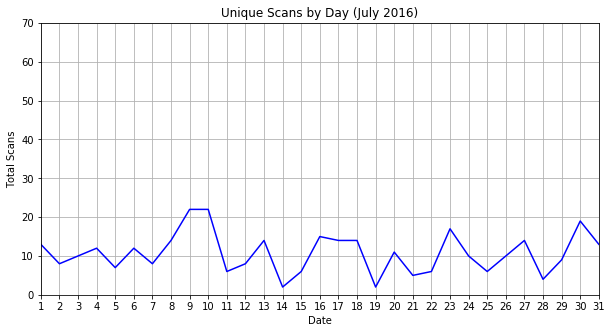

In [385]:
feb2012_stats.create_plot()

In [387]:
january2012_stats.get_day_of_week()

'Saturday'

In [239]:
weather

array([['USC00202437', 'EATON RAPIDS, MI US', '2012-01-03', nan, 17.0],
       ['USC00202437', 'EATON RAPIDS, MI US', '2012-01-04', nan, 22.0],
       ['USC00202437', 'EATON RAPIDS, MI US', '2012-01-09', nan, 28.0],
       ['USC00202437', 'EATON RAPIDS, MI US', '2012-01-10', nan, 28.0],
       ['USC00202437', 'EATON RAPIDS, MI US', '2012-01-11', nan, 28.0],
       ['USC00202437', 'EATON RAPIDS, MI US', '2012-01-12', nan, 37.0],
       ['USC00202437', 'EATON RAPIDS, MI US', '2012-01-13', nan, 27.0],
       ['USC00202437', 'EATON RAPIDS, MI US', '2012-01-16', nan, 24.0],
       ['USC00202437', 'EATON RAPIDS, MI US', '2012-01-17', nan, 39.0],
       ['USC00202437', 'EATON RAPIDS, MI US', '2012-01-18', nan, 19.0],
       ['USC00202437', 'EATON RAPIDS, MI US', '2012-01-19', nan, 28.0],
       ['USC00202437', 'EATON RAPIDS, MI US', '2012-01-22', nan, 21.0],
       ['USC00202437', 'EATON RAPIDS, MI US', '2012-01-23', nan, 45.0],
       ['USC00202437', 'EATON RAPIDS, MI US', '2012-01-24', nan,

In [312]:
np.set_printoptions(threshold=np.nan)

weather = pd.read_csv('weather_data.csv', sep = ',', header = 0)
weather = weather.values
weather_data = np.zeros(4585)

for i in range(2576):
    weather_data[i] = weather[i][4]
    
for i in range(2009):
    weather_data[i+2576] = weather[i+2733][3]
    
weather_data # data from 1/3/12 to 9/30/18



array([ 17.,  22.,  28.,  28.,  28.,  37.,  27.,  24.,  39.,  19.,  28.,
        21.,  45.,  32.,  29.,  31.,  34.,  21.,  43.,  38.,  35.,  31.,
        31.,  33.,  21.,  24.,  30.,  20.,  33.,  38.,  32.,  20.,  33.,
        33.,  32.,  33.,  37.,  22.,  35.,  36.,  33.,  24.,  33.,  51.,
        46.,  30.,  26.,  39.,  49.,  38.,  61.,  50.,  52.,  53.,  56.,
        58.,  56.,  56.,  59.,  53.,  50.,  31.,  30.,  58.,  38.,  34.,
        35.,  38.,  37.,  41.,  37.,  35.,  31.,  35.,  48.,  44.,  36.,
        35.,  34.,  34.,  54.,  59.,  65.,  38.,  37.,  55.,  59.,  35.,
        37.,  37.,  42.,  39.,  51.,  33.,  41.,  34.,  42.,  49.,  54.,
        69.,  64.,  52.,  52.,  52.,  43.,  58.,  51.,  50.,  43.,  53.,
        62.,  51.,  50.,  62.,  74.,  70.,  56.,  48.,  50.,  50.,  59.,
        58.,  53.,  52.,  59.,  57.,  68.,  74.,  69.,  66.,  51.,  55.,
        62.,  70.,  70.,  66.,  76.,  74.,  77.,  63.,  58.,  69.,  57.,
        56.,  60.,  70.,  71.,  88.,  70.,  67.,  7

In [347]:
weather[2488][1]

'GRAND LEDGE 1 NW, MI US'

In [267]:
weather_data[2570:2580]

array([31., 31., 31., 28., 27., 43., 33., 29., 31., 39.])

In [287]:
weather_january2012 = weather_data[0:19]
weather_february2012 = weather_data[19:38] 
weather_march2012 = weather_data[38:67]
weather_april2012 = weather_data[67:97] #complete
weather_may2012 = weather_data[97:118] 
weather_june2012 = weather_data[118:148] #complete
weather_july2012 = weather_data[148:166] 
weather_august2012 = weather_data[166:192]
weather_september2012 = weather_data[192:205]
weather_october2012 = weather_data[205:228]
weather_november2012 = weather_data[228:249]
weather_december2012 = weather_data[249:272]

In [288]:
weather_january2013 = weather_data[272:299]
weather_february2013 = weather_data[299:316]
weather_march2013 = weather_data[316:332]
weather_april2013 = weather_data[332:349]
weather_may2013 = weather_data[349:368]
weather_june2013 = weather_data[368:382]
weather_july2013 = weather_data[382:397]
weather_august2013 = weather_data[397:424]
weather_september2013 = weather_data[424:452]
weather_october2013 = weather_data[452:483] #complete
weather_november2013 = weather_data[483:509]
weather_december2013 = weather_data[509:536]


In [313]:
def correct_date_for_weather(array):
    correct_dates_weather = []
    for i in range(0, len(array)):
        date_time = array[i][2]
        date = date_time[0:10]
        find_month = date.partition('-')
        year = int(find_month[0])
        find_day = find_month[2].partition('-')
        month = int(find_day[0])
        day = int(find_day[2])
        correct_dates_weather.append([month, day, year])
    return(correct_dates_weather)

In [368]:
corrected_weather_date = correct_date_for_weather(weather)
len(corrected_weather_date)

4742

In [346]:
print(date_weather[2000])
print(weather_data[2000])

[   5   29 2018]
71.0


In [369]:
date_weather = np.zeros((4742,3), dtype = np.int)

for i in range(len(corrected_weather_date)):
    date_weather[i][0] = int(corrected_weather_date[i][0])
    date_weather[i][1] = int(corrected_weather_date[i][1])
    date_weather[i][2] = int(corrected_weather_date[i][2])
''''   
for i in range(2009):
    date_weather[i+2576][0] = int(corrected_weather_date[i+2733][0])
    date_weather[i+2576][1] = int(corrected_weather_date[i+2733][1])
    date_weather[i+2576][2] = int(corrected_weather_date[i+2733][2])
'''
date_weather # date corresponding to weather_data from 1/3/12 to 9/30/18

array([[   1,    3, 2012],
       [   1,    4, 2012],
       [   1,    9, 2012],
       [   1,   10, 2012],
       [   1,   11, 2012],
       [   1,   12, 2012],
       [   1,   13, 2012],
       [   1,   16, 2012],
       [   1,   17, 2012],
       [   1,   18, 2012],
       [   1,   19, 2012],
       [   1,   22, 2012],
       [   1,   23, 2012],
       [   1,   24, 2012],
       [   1,   25, 2012],
       [   1,   26, 2012],
       [   1,   27, 2012],
       [   1,   30, 2012],
       [   1,   31, 2012],
       [   2,    1, 2012],
       [   2,    2, 2012],
       [   2,    3, 2012],
       [   2,    6, 2012],
       [   2,    7, 2012],
       [   2,    8, 2012],
       [   2,    9, 2012],
       [   2,   10, 2012],
       [   2,   13, 2012],
       [   2,   15, 2012],
       [   2,   16, 2012],
       [   2,   17, 2012],
       [   2,   20, 2012],
       [   2,   21, 2012],
       [   2,   22, 2012],
       [   2,   23, 2012],
       [   2,   24, 2012],
       [   2,   27, 2012],
 

In [397]:
complete_weather_temps = np.zeros((608,5), dtype=np.int)

for i in range(len(weather)):
    if weather[i][1] == 'GRAND LEDGE 1 NW, MI US':
        
        complete_weather_temps[i-2125][3] = weather[i][4]
        complete_weather_temps[i-2125][0] = int(corrected_weather_date[i][0])
        complete_weather_temps[i-2125][1] = int(corrected_weather_date[i][1])
        complete_weather_temps[i-2125][2] = int(corrected_weather_date[i][2])
        
complete_weather_temps
        

array([[   1,    1, 2012,   40,    0],
       [   1,    2, 2012,   25,    0],
       [   1,    3, 2012,   18,    0],
       [   1,    4, 2012,   23,    0],
       [   1,    5, 2012,   28,    0],
       [   1,    6, 2012,   39,    0],
       [   1,    7, 2012,   34,    0],
       [   1,    8, 2012,   25,    0],
       [   1,    9, 2012,   30,    0],
       [   1,   10, 2012,   31,    0],
       [   1,   11, 2012,   31,    0],
       [   1,   12, 2012,   36,    0],
       [   1,   13, 2012,   24,    0],
       [   1,   14, 2012,   21,    0],
       [   1,   15, 2012,   13,    0],
       [   1,   16, 2012,   22,    0],
       [   1,   17, 2012,   37,    0],
       [   1,   18, 2012,   19,    0],
       [   1,   19, 2012,   27,    0],
       [   1,   20, 2012,    5,    0],
       [   1,   21, 2012,    6,    0],
       [   1,   22, 2012,   21,    0],
       [   1,   23, 2012,   44,    0],
       [   1,   24, 2012,   32,    0],
       [   1,   25, 2012,   29,    0],
       [   1,   26, 2012,

In [ ]:
def getting_unique_users_for_weather(year_array):
    for i in range(len(year_array)):
        if i < 31:
            jan2012 = get_stats_for_month(31, 1, 2012, dates_2012, data_2012)
            
    

In [ ]:
for i in range(len(data_2012)):
    